In [1]:
import fastai.tabular.all as ft
import pandas as pd


import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
data = pd.read_csv("data.csv")#, low_memory=False)#, parse_dates=['date_confirmation'])

Low Memory para dataset grandes

In [3]:
data.shape

(398, 11)

In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
class_mpg       0
is_able         0
dtype: int64

No hay datos faltantes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
class_mpg       398 non-null int64
is_able         398 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 34.3+ KB


In [6]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0


In [7]:
data['mpg'].head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Clean Data

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
data[data['horsepower']=='?'] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,1,0
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,3,0
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,1,0
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,2,0
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,1,0


In [10]:
data[data['horsepower']=='?'] = int (data[data['horsepower']!='?']['horsepower'].unique().astype('int64', copy=False ).mean() )

In [11]:
data = data.astype({"horsepower": int})

In [12]:
data.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null int64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
class_mpg       398 non-null int64
is_able         398 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 34.3+ KB


### Set Variables names

In [14]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'class_mpg',
       'is_able'],
      dtype='object')

In [15]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0,1
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0,1
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0,1
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0,0


In [16]:
cat_names = ['car_name','origin', 'class_mpg','is_able']
#La dsitancia entre estos no tiene sentido

cont_names = ['cylinders', 'displacement', 
              'horsepower', 'weight',
              'acceleration', 'model_year'] 

y_names = ['mpg']

In [17]:
print("{} nombres de autos diferentes".format(len(data.mpg.unique()) ) ) 

128 nombres de autos diferentes


### Create Learner

In [18]:
X = ft.range_of(data)
len(X)

398

In [19]:
valid_cut = int(len(data)*.2)
valid_cut

79

In [20]:
src = ft.TabularPandas(data,
                      procs = [ft.Categorify, ft.FillMissing],
                      cat_names = cat_names,
                      cont_names = cont_names,
                      y_names = y_names, 
                      y_block = ft.RegressionBlock,
                      splits = (X[:valid_cut], X[valid_cut:])
                      )

In [21]:
dls = src.dataloaders(bs=32)

dataloaders

In [22]:
data.groupby('car_name').mpg.count()

car_name
113                        6
amc ambassador brougham    1
amc ambassador dpl         1
amc ambassador sst         1
amc concord                2
                          ..
vw dasher (diesel)         1
vw pickup                  1
vw rabbit                  2
vw rabbit c (diesel)       1
vw rabbit custom           1
Name: mpg, Length: 302, dtype: int64

In [23]:
learn = ft.tabular_learner(dls,
                          loss_func = nn.MSELoss(),
                           emb_szs = {'car_name':16},
                           layers = [64,128,256], #Numero de neuronas en cada capa oculta
                           config = ft.tabular_config(act_cls=nn.LeakyReLU(inplace=True)),
                           #ps(dropout), embedingdropout, sigmoide, batchnorm, activacion
                           opt_func = ft.ranger,
                           metrics = nn.L1Loss())

In [24]:
 learn.metrics = [nn.L1Loss()]

- Función de pérdida: CrossEntropyLossFlat con balanceo de peso en las clases en caso de ser nececsario
- Tamaño del embedding de las clases de 302 a 64

In [25]:
a = dls[0].one_batch()
#0 train
#1 test
#2 opcional

In [26]:
a

(tensor([[162,   1,   2,   1],
         [242,   1,   1,   2],
         [ 50,   1,   1,   1],
         [ 66,   1,   3,   1],
         [218,   1,   2,   1],
         [187,   1,   2,   1],
         [ 64,   1,   2,   1],
         [102,   1,   1,   1],
         [ 55,   1,   1,   2],
         [ 77,   3,   3,   1],
         [ 10,   1,   1,   1],
         [ 55,   1,   1,   2],
         [113,   1,   1,   2],
         [ 76,   1,   1,   2],
         [142,   1,   1,   1],
         [192,   1,   1,   2],
         [270,   3,   2,   1],
         [134,   1,   1,   2],
         [ 50,   1,   1,   1],
         [ 65,   1,   2,   1],
         [ 55,   1,   1,   2],
         [291,   2,   2,   1],
         [ 12,   1,   1,   1],
         [106,   1,   2,   1],
         [256,   2,   2,   1],
         [151,   1,   2,   1],
         [ 32,   1,   1,   2],
         [293,   2,   1,   1],
         [232,   1,   1,   1],
         [161,   1,   1,   1],
         [ 31,   1,   1,   2],
         [ 15,   1,   1,   1]], device=

In [27]:
a[0].shape

torch.Size([32, 4])

In [28]:
a[1].shape

torch.Size([32, 6])

In [29]:
a[2].shape

torch.Size([32, 1])

In [30]:
dls.bs

32

Tamaño de lote (filas)

In [31]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(303, 16)
    (1): Embedding(5, 4)
    (2): Embedding(5, 4)
    (3): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=33, out_features=64, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=64, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=128, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inp

Capas lineales -> multiplicaciones de matrices

Después de cada multiplicación se hace una activación. Negative slope en LeakyReLU es la pendiente de los números negativos en la activación.

La información del modelo se codifica en las matrices. Para que no se pierda la información al hacer la multiplicación de muchas matrices, se usan funciones de activación.

Activaciones de los modelos:
- Adentro:
> - ReLU
> - Leaky ReLU
- Output (función de activación al final del modelo):
> - Sigmoide
> - TanH


In [32]:
learn.model.cuda()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(303, 16)
    (1): Embedding(5, 4)
    (2): Embedding(5, 4)
    (3): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=33, out_features=64, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=64, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=128, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inp

#### * Modelos Lineales:
- Normalizar para que los resultdos no se vayan a infinito
- Capa Lineal (Multiplicaciones de Tensores)
- Activación

* **Tensor más grande cada bloque** 
* **Última capa del tamaño del tensor de categorías**  _Qué tan probable es que sea cada categoría_

#### Embedings:
* Lista de vectores de tamaño controlable < Fastai tiene sus heurísticas >
* Cada vector asociado a las categorías

Ejemplo
* (embeds): ModuleList(
*    (0): Embedding(114, 8)
> - 114: lista
> - tamaño del embeding que di

In [33]:
learn.model(a[0],a[1])

tensor([[-0.2857],
        [-0.1750],
        [-0.1001],
        [-0.5223],
        [-0.0714],
        [-0.3416],
        [-0.0301],
        [ 0.2735],
        [ 0.1073],
        [-0.1604],
        [-0.2360],
        [ 0.0475],
        [-0.5917],
        [ 0.0178],
        [ 0.2357],
        [ 0.1917],
        [-0.0777],
        [-0.0236],
        [-0.0904],
        [-0.2875],
        [ 0.0600],
        [ 0.2517],
        [-0.1269],
        [-0.1752],
        [ 0.0274],
        [-0.2861],
        [-0.2132],
        [-0.3145],
        [-0.1574],
        [-0.1079],
        [-0.2311],
        [-0.1978]], device='cuda:0', grad_fn=<AddmmBackward>)

In [34]:
learn.model(a[0],a[1]).shape

torch.Size([32, 1])

In [35]:
learn.loss_func

MSELoss()

In [36]:
learn.model.layers[0][1].weight.shape

torch.Size([64, 33])

SuggestedLRs(lr_min=0.09120108485221863, lr_steep=7.585775847473997e-07)

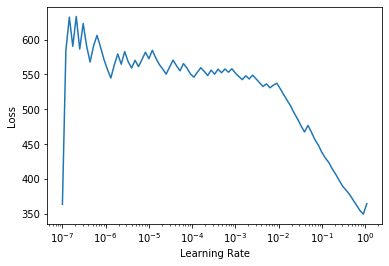

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(20, 1e-3, div=2, pct_start=0.5)

epoch,train_loss,valid_loss,None,time
0,385.017334,784.767456,24.733101,00:00
1,475.091919,801.394226,25.048956,00:00
2,481.841309,833.376770,25.630774,00:00
3,497.810547,837.551514,25.713867,00:00
4,467.589874,834.586914,25.679331,00:00
5,479.645172,838.166748,25.747778,00:00
6,493.887970,838.599915,25.763607,00:00
7,503.009705,837.415771,25.751818,00:00
8,506.547333,837.296997,25.747208,00:00
9,510.374329,834.573486,25.709608,00:00


In [39]:
learn.fit_one_cycle(30, 1e-3, div=2, pct_start=0.5)

epoch,train_loss,valid_loss,None,time
0,513.092834,808.784851,25.390205,00:00
1,429.549225,802.114624,25.334322,00:00
2,457.549774,800.025452,25.294926,00:00
3,467.112183,801.995178,25.295101,00:00
4,431.258881,793.755920,25.218006,00:00
5,410.809387,784.430542,25.136389,00:00
6,424.794128,788.693909,25.157085,00:00
7,435.427582,785.278809,25.098015,00:00
8,442.579742,778.490173,25.004890,00:00
9,427.221985,775.697266,24.990088,00:00


In [41]:
learn.fit_one_cycle(20, 1e-3, div=2, pct_start=0.5)

epoch,train_loss,valid_loss,None,time
0,176.709549,265.655945,15.273860,00:00
1,160.230438,269.283569,15.396396,00:00
2,156.828827,247.909409,14.675625,00:00
3,157.158600,215.821686,13.499507,00:00
4,150.222382,237.106918,14.304303,00:00
5,145.517700,206.380615,13.132552,00:00
6,138.745682,183.153290,12.094531,00:00
7,131.341248,205.073227,13.020373,00:00
8,127.197556,179.237961,11.959765,00:00
9,127.554184,157.953186,11.087339,00:00


In [42]:
learn.fit_one_cycle(20, 1e-3, div=2, pct_start=0.5)

epoch,train_loss,valid_loss,None,time
0,65.236893,160.727371,11.182216,00:00
1,54.947605,160.306961,11.078480,00:00
2,50.998833,156.241226,10.960897,00:00
3,48.793518,153.420746,10.320059,00:00
4,43.559162,173.668869,10.147684,00:00
5,44.507336,157.507828,10.000130,00:00
6,46.642899,149.193893,10.046236,00:00
7,46.920315,142.796478,9.994514,00:00
8,45.236370,140.196732,9.947275,00:00
9,48.239140,126.957458,9.509906,00:00


El modelo de regresión tiene un error de 9.48 MPG

In [43]:
learn.metrics

(#1) [<fastai.learner.AvgMetric object at 0x7f99bd228c18>]

In [67]:
 learn.metrics = [nn.L1Loss()]

# Predictions

Las predicciones llevan tres pasos:
* Codificar los datos a números usando los números de las clases que determona el modelo
* Pasar el input al modelo 
* Obtener el mayor índice correspondinte a las categorías y asociarlo a la clase.

## Método manual

- cat_names = ['car_name','origin', 'class_mpg','is_able']

_La dsitancia entre estos no tiene sentido_

In [119]:
dls.classes

{'car_name': ['#na#', 113, 'amc ambassador brougham', 'amc ambassador dpl', 'amc ambassador sst', 'amc concord', 'amc concord d/l', 'amc concord dl 6', 'amc gremlin', 'amc hornet', 'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)', 'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl', 'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i', 'buick century', 'buick century 350', 'buick century limited', 'buick century luxus (sw)', 'buick century special', 'buick electra 225 custom', 'buick estate wagon (sw)', 'buick lesabre custom', 'buick opel isuzu deluxe', 'buick regal sport coupe (turbo)', 'buick skyhawk', 'buick skylark', 'buick skylark 320', 'buick skylark limited', 'cadillac eldorado', 'cadillac seville', 'capri ii', 'chevroelt chevelle malibu', 'chevrolet bel air', 'chevrolet camaro', 'chevrolet caprice classic', 'chevrolet cavalier', 'chevrolet cavalier 2-door', 'chevrolet cavalier wagon', 'chevrol

In [125]:
data_pred_cat = ['toyota corona', '1', '2', '1']

- cont_names = ['cylinders', 'displacement','horsepower', 'weight','acceleration', 'model_year'] 

In [122]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0


In [123]:
data_pred_cont = [8 , 307.1950, 180, 3000, 10, 75]

In [126]:
data_pred_cat_2_num = []
for name, value in zip (dls.classes.keys(), data_pred_cat):
    data_pred_cat_2_num.append(dls.classes[name].map_objs([value])[0])
    

In [127]:
data_pred_cat_2_num

[269, 0, 0, 0]

In [128]:
data_pred_cat = torch.tensor(data_pred_cat_2_num).cuda()

In [129]:
data_pred_cont = torch.tensor(data_pred_cont).cuda()

In [130]:
data_pred_cont.shape

torch.Size([6])

In [131]:
data_pred_cat.shape

torch.Size([4])

In [132]:
learn.model(data_pred_cat[None],data_pred_cont[None])

tensor([[25.2684]], device='cuda:0', grad_fn=<AddmmBackward>)

### La predicción es de 25.2684 MPG

## Fastai

### Para hacer la predicción debemos pasar el input como un dataframe

In [136]:
data.iloc[0]

mpg                                    18
cylinders                               8
displacement                          307
horsepower                            130
weight                               3504
acceleration                           12
model_year                             70
origin                                  1
car_name        chevrolet chevelle malibu
class_mpg                               0
is_able                                 0
Name: 0, dtype: object

In [139]:
#learn.predict(data.iloc[0])

- cat_names = ['car_name','origin', 'class_mpg','is_able']

- cont_names = ['cylinders', 'displacement','horsepower', 'weight','acceleration', 'model_year'] 

In [142]:
dic_key_val = { name: [value] for name, value in zip (dls.classes.keys(), ['toyota corona', '1', '2', '1'])}
dic_key_val['cylinders'] = [8]
dic_key_val['displacement'] = [307.1950] 
dic_key_val['horsepower'] = [180]
dic_key_val['weight'] = [3000]
dic_key_val['acceleration'] = [10]
dic_key_val['model_year'] = [75]

#[8 , 307.1950, 180, 3000, 10, 75]

In [143]:
pred = pd.DataFrame(dic_key_val).iloc[0]
pred

car_name        toyota corona
origin                      1
class_mpg                   2
is_able                     1
cylinders                   8
displacement          307.195
horsepower                180
weight                   3000
acceleration               10
model_year                 75
Name: 0, dtype: object

In [144]:
learn.predict(pred)

(   car_name  origin  class_mpg  is_able  cylinders  displacement  horsepower  \
 0     269.0     0.0        0.0      0.0        8.0    307.195007       180.0   
 
    weight  acceleration  model_year      mpg  
 0  3000.0          10.0        75.0  25.2684  ,
 tensor([25.2684]),
 tensor([25.2684]))

### La predicción es de 25.26 MPG